In [14]:
import numpy as np
import cv2
from IPython.display import display, clear_output
import matplotlib.pyplot as plt


In [15]:
# load a video file
cap = cv2.VideoCapture('traffic.mp4')

# take first frame of the video
ret,frame = cap.read()

In [16]:
# setup initial location of window
r,h,c,w = 250,90,400,125  # simply hardcoded the values
track_window = (c,r,w,h)

# set up the ROI for tracking
roi = frame[r:r+h, c:c+w]
hsv_roi =  cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

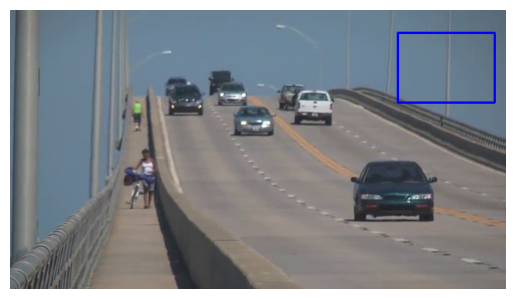

<Figure size 640x480 with 0 Axes>

In [17]:
while(1):
    ret ,frame = cap.read()

    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)

        # apply meanshift to get the new location
        ret, track_window = cv2.meanShift(dst, track_window, term_crit)
        
        # Draw it on image
        x,y,w,h = track_window
        img2 = cv2.rectangle(frame, (x,y), (x+w,y+h), 255,2)

        # Show video frame in notebook
        plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        clear_output(wait=True)
        display(plt.gcf())
        plt.clf()
        k = cv2.waitKey(60) & 0xff # Slow to show output
#         k = cv2.waitKey(10) & 0xff # Fast to show output
        if k == 27:
            break
#         else:
#             cv2.imwrite(chr(k)+".jpg",img2) # Save last output

    else:
        break

cv2.destroyAllWindows()
cap.release()